#Polars Plotting

In [1]:
!pip install altair -U -q
!pip install hvplot -q
#RESTART RUNTIME

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
marimo 0.9.11 requires websockets<13.0.0,>=10.0.0, but you have websockets 14.2 which is incompatible.


In [2]:
import polars as pl

print(pl.__version__)

1.23.0


In [3]:
#path = "data/iris.csv"
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.csv"

df = pl.read_csv(path)
df

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""virginica"""
6.3,2.5,5.0,1.9,"""virginica"""
6.5,3.0,5.2,2.0,"""virginica"""


### Altair (Built-in)

In [4]:
## Altair by default inside Polars
(
df.plot.point(
                x="sepal_length",
                y="sepal_width",
                color="species",
            )
            .properties(width=500)
            .configure_scale(zero=False)
)

alt.Chart(...)

### hvplot

In [5]:
import hvplot.polars

df.hvplot.scatter(
                    x="sepal_width",
                    y="sepal_length",
                    by="species",
                    width=650,
                    )

:NdOverlay   [species]
   :Scatter   [sepal_width]   (sepal_length)

### Matplotlib

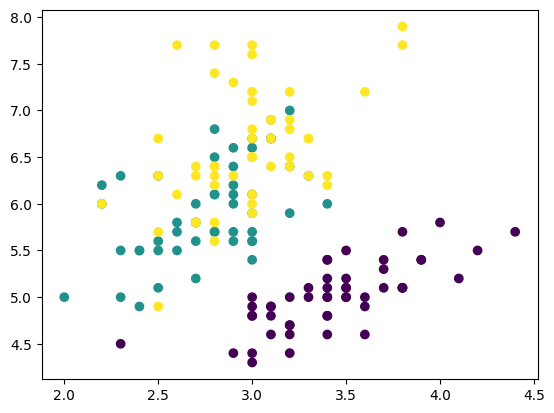

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(
            x=df["sepal_width"],
            y=df["sepal_length"],
            c=df["species"].cast(pl.Categorical).to_physical(),
            );

### Seaborn

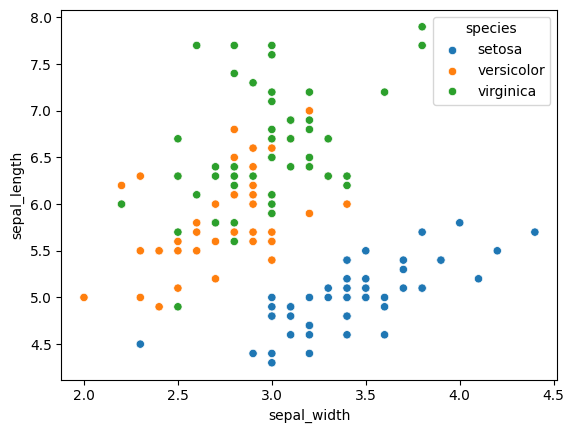

In [7]:
import seaborn as sns

sns.scatterplot(
                df,
                x="sepal_width",
                y="sepal_length",
                hue="species",
                );

### Plotly

In [9]:
import plotly.express as px

px.scatter(
            df,
            x="sepal_width",
            y="sepal_length",
            color="species",
            width=650,
            )